### Import the required libraries 

In [6]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
from networkx import  distance_measures as dm
import numpy as np

### Get data from the source
The data used for this assignment is about the connections among the team of Donald Trump. The data is available on github and it can be read directly from the source.

In [2]:
df_edges = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/sample-social-network-datasets/master/sample-datasets/trump/trump-edges.csv")
df_edges.head()

,Source,Target,Weight,Relationship,Citation
0,Paul Teller,Donald J. Trump,1,Special assistant,https://www.documentcloud.org/documents/353434...
1,Donald J. Trump,Joe Hagin,1,Deputy chief of staff for operations,http://www.cnn.com/2017/01/04/politics/bill-st...
2,Donald J. Trump,Kellyanne Conway,1,White House Counselor,General knowledge
3,Donald J. Trump,Wilbur Ross,1,Secretary of Commerce,General knowledge
4,Donald J. Trump,George E. Norcross Iii,1,"""whose friendship with Mr. Trump dates to the ...",https://www.nytimes.com/2017/02/18/us/mar-a-la...


In [5]:
df_edges.Weight.unique()

array([1], dtype=int64)

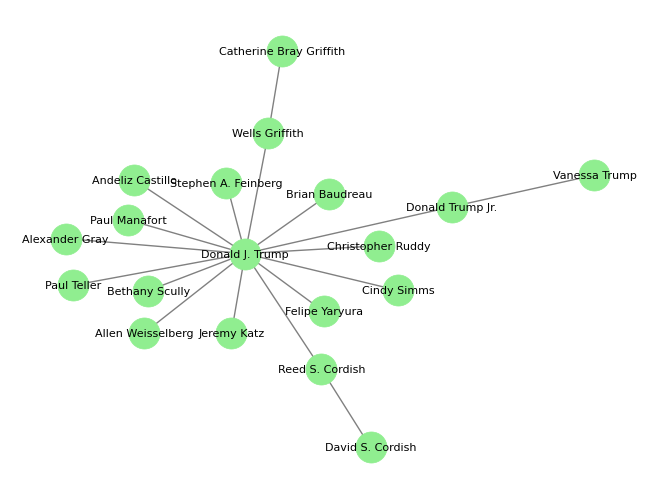

In [33]:
# take a subset of the data. The subset can be taken by selecting randomly the candidate from the team. 
np.random.seed(100)
sample_df_edges = df_edges.sample(n=28, random_state=42)

# Create a directed graph

G = nx.Graph()

# Add edges from sample_df_edges DataFrame

for i, row in sample_df_edges.iterrows():
    G.add_edge(row['Source'], row['Target'])

# Get connected components
connected_components = list(nx.connected_components(G))

# Keep only the largest connected component
largest_connected_component = max(connected_components, key=len)

# Create a new graph containing only the largest connected component
fG = G.subgraph(largest_connected_component)

# Set node positions
pos = nx.spring_layout(fG)

# Draw the graph

nx.draw(fG, pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=8, edge_color='gray', linewidths=0.5)

# Display the graph

plt.show()


This network graph shows who is linked to whom. Some nodes are are connectected to more than one nodes.Some nodes are connected to only one node making a birany connection between two nodes.

### <li> Basic analysis of the graph
    
1- Diameter of the graph

In [15]:
d = dm.diameter(fG)
print(f"The diameter of the graph: {d}")

The diameter of the graph: 4


2- Radius of the graph

In [17]:
r = dm.radius(fG)
print(f"The radius of the graph: {r}")

The radius of the graph: 2


3- Closness of nodes:

In [34]:
 nx.closeness_centrality(G)

{'Avrahm Berkowitz': 0.037037037037037035,
 'Jared Kushner': 0.05555555555555555,
 'Donald J. Trump': 0.42857142857142855,
 'Wells Griffith': 0.25,
 'Allen Weisselberg': 0.23684210526315788,
 'Catherine Bray Griffith': 0.16981132075471697,
 'Paul Manafort': 0.23684210526315788,
 'David S. Cordish': 0.16981132075471697,
 'Reed S. Cordish': 0.25,
 'Donald Trump Jr.': 0.25,
 'Felipe Yaryura': 0.23684210526315788,
 'Cindy Simms': 0.23684210526315788,
 'Stephen A. Feinberg': 0.23684210526315788,
 'Madeleine Westerhout': 0.027777777777777776,
 'Rhona Graff Riccio': 0.027777777777777776,
 'Don Mcgahn': 0.05555555555555555,
 'James Burnham': 0.037037037037037035,
 'Christopher Ruddy': 0.23684210526315788,
 'Bethany Scully': 0.23684210526315788,
 'Greg Katsas': 0.037037037037037035,
 'Paul Teller': 0.23684210526315788,
 'Mike Pence': 0.027777777777777776,
 'Jen Pavlik': 0.027777777777777776,
 'Chris Christie': 0.027777777777777776,
 'David Wildstein': 0.027777777777777776,
 'Jeremy Katz': 0.236

This shows that Donal J Trump is the central node with highest value of closeness. Wells Griffith, Donald Trump Jr, Reed S. Cordish. has seocnd highest closeness score and thus they act as secondary or local center in the graph
and Paul Manafort, Allen Weisselberg, Jeremy Katz, Brian Baudreau, Andeliz Castillo, Felipe Yaryura, Cindy Simms, Stephen A. Feinberg are closer but act as nodes not a local center according to the above network graph. 

In [35]:
nx.average_degree_connectivity(G)

{1: 6.645161290322581, 2: 5.2, 15: 1.2}